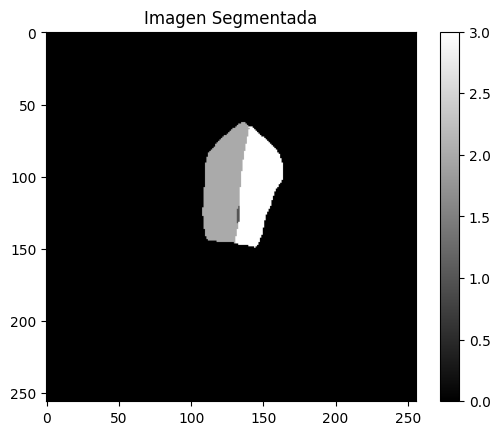

Matriz de valores de píxeles:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Valores únicos de píxeles encontrados: [0 1 2 3]


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/home/voicelab/Desktop/segmentation_glottis/LSTM_Unet/dataset/train/00001_mask.png'

segmented_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

unique_values = np.unique(segmented_image)

plt.imshow(segmented_image, cmap='gray')
plt.colorbar()
plt.title('Imagen Segmentada')
plt.show()

print("Matriz de valores de píxeles:")
print(segmented_image)

print("Valores únicos de píxeles encontrados:", unique_values)


Valores únicos de píxeles encontrados: [0 1 2 3]

Coordenadas para la clase 'glottis' (ID: 1):
[133 121 133 122 132 123 132 132 133 131]

Coordenadas para la clase 'vocal_cord_left' (ID: 2):
[135  63 134  64 133  64 130  67 129  67 124  72 123  72 117  78 117  79
 112  84 112  86 111  87 111  90 110  91 110 107 109 108 109 121 108 122
 108 127 109 128 109 136 110 137 110 141 111 142 111 143 112 144 117 144
 118 145 129 145 130 146 130 142 131 141 131 137 132 136 132 133 131 132
 131 123 132 122 132 121 133 120 133 108 134 107 134  97 135  96 135  89
 136  88 136  83 137  82 137  78 138  77 138  73 139  72 139  68 140  67
 139  66 139  65 137  63]

Coordenadas para la clase 'vocal_cord_right' (ID: 3):
[140  66 141  67 140  68 140  72 139  73 139  77 138  78 138  82 137  83
 137  88 136  89 136  96 135  97 135 107 134 108 134 131 133 132 133 136
 132 137 132 141 131 142 131 146 132 146 133 147 139 147 140 148 143 148
 144 149 146 147 146 146 147 145 147 143 148 142 148 141 149 140 149 13

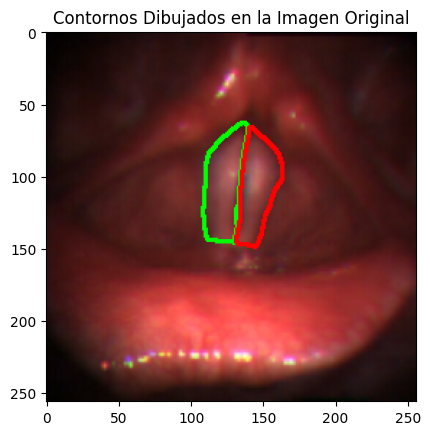

Extracción y visualización completadas.


In [15]:

original_image_path = '/home/voicelab/Desktop/segmentation_glottis/LSTM_Unet/dataset/train/00001_rgb.png'

original_image = cv2.imread(original_image_path)

unique_values = np.unique(segmented_image)
print("Valores únicos de píxeles encontrados:", unique_values)

CLASS_COLORS = {  
    0: 'background',
    1: 'glottis',       
    2: 'vocal_cord_left', 
    3: 'vocal_cord_right' 
}

DRAW_COLORS = {
    1: (255, 0, 0),       
    2: (0, 255, 0),       
    3: (0, 0, 255)        
}

height, width = segmented_image.shape

for class_id, class_name in CLASS_COLORS.items():
    if class_id == 0:
        continue  

    contours, _ = cv2.findContours((segmented_image == class_id).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    print(f"\nCoordenadas para la clase '{class_name}' (ID: {class_id}):")
    for contour in contours:
        cv2.drawContours(original_image, [contour], -1, DRAW_COLORS[class_id], 2)
        contour = contour.flatten()
        print(contour)

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Contornos Dibujados en la Imagen Original')
plt.show()



In [18]:
for class_id, class_name in CLASS_COLORS.items():
    if class_id == 0:
        continue  

    contours, _ = cv2.findContours((segmented_image == class_id).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    print(class_id)
    for contour in contours:
        contour = contour.flatten()
        normalized_contour = [(contour[i] / width if i % 2 == 0 else contour[i] / height) for i in range(len(contour))]
        line = f"{class_id} " + ' '.join(map(str, normalized_contour)) + '\n'
        print(line)

1
1 0.51953125 0.47265625 0.51953125 0.4765625 0.515625 0.48046875 0.515625 0.515625 0.51953125 0.51171875

2
2 0.52734375 0.24609375 0.5234375 0.25 0.51953125 0.25 0.5078125 0.26171875 0.50390625 0.26171875 0.484375 0.28125 0.48046875 0.28125 0.45703125 0.3046875 0.45703125 0.30859375 0.4375 0.328125 0.4375 0.3359375 0.43359375 0.33984375 0.43359375 0.3515625 0.4296875 0.35546875 0.4296875 0.41796875 0.42578125 0.421875 0.42578125 0.47265625 0.421875 0.4765625 0.421875 0.49609375 0.42578125 0.5 0.42578125 0.53125 0.4296875 0.53515625 0.4296875 0.55078125 0.43359375 0.5546875 0.43359375 0.55859375 0.4375 0.5625 0.45703125 0.5625 0.4609375 0.56640625 0.50390625 0.56640625 0.5078125 0.5703125 0.5078125 0.5546875 0.51171875 0.55078125 0.51171875 0.53515625 0.515625 0.53125 0.515625 0.51953125 0.51171875 0.515625 0.51171875 0.48046875 0.515625 0.4765625 0.515625 0.47265625 0.51953125 0.46875 0.51953125 0.421875 0.5234375 0.41796875 0.5234375 0.37890625 0.52734375 0.375 0.52734375 0.3476562

In [27]:
import os
import cv2
import numpy as np

base_dir = '/home/voicelab/Desktop/segmentation_glottis/LSTM_Unet/dataset'
output_dir = '/home/voicelab/Desktop/segmentation_glottis/YOLO_dataset'

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels', split), exist_ok=True)

CLASS_COLORS = {
    0: 'background',
    1: 'glottis',       
    2: 'vocal_cord_left', 
    3: 'vocal_cord_right' 
}

def process_folder(folder_name):
    images_folder = os.path.join(base_dir, folder_name)
    
    if not os.path.exists(images_folder):
        print(f"La carpeta {images_folder} no existe.")
        return
    
    print(f"Procesando carpeta: {images_folder}")
    
    count_processed = 0  
    for file_name in os.listdir(images_folder):
        if '_mask.png' in file_name:
            mask_path = os.path.join(images_folder, file_name)
            image_path = mask_path.replace('_mask.png', '_rgb.png')
            
            segmented_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            original_image = cv2.imread(image_path)
            
            if segmented_image is None:
                print(f"No se pudo leer la imagen de máscara: {mask_path}")
                continue
            if original_image is None:
                print(f"No se pudo leer la imagen original: {image_path}")
                continue
            
            height, width = segmented_image.shape

            base_name = os.path.basename(mask_path).replace('_mask.png', '')

            output_image_path = os.path.join(output_dir, 'images', folder_name, base_name + '.png')
            output_label_path = os.path.join(output_dir, 'labels', folder_name, base_name + '.txt')

            print(f"Guardando imagen original en: {output_image_path}")
            print(f"Guardando etiquetas en: {output_label_path}")

            cv2.imwrite(output_image_path, original_image)

            with open(output_label_path, 'w') as label_file:
                for class_id, class_name in CLASS_COLORS.items():
                    if class_id == 0:
                        continue  

                    contours, _ = cv2.findContours((segmented_image == class_id).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    
                    for contour in contours:
                        if len(contour) < 5:  
                            continue
                        contour = contour.flatten()
                        normalized_contour = [(contour[i] / width if i % 2 == 0 else contour[i] / height) for i in range(len(contour))]
                        line = f"{class_id} " + ' '.join(map(str, normalized_contour)) + '\n'
                        label_file.write(line)

            count_processed += 1  
    
    if count_processed == 0:
        print(f"No se procesaron archivos en la carpeta: {images_folder}")
    else:
        print(f"Archivos procesados en la carpeta {images_folder}: {count_processed}")

for split in ['train', 'val', 'test']:
    process_folder(split)

print("Conversión completada.")

def print_directory_structure(dir_path, indent=0):
    for item in os.listdir(dir_path):
        item_path = os.path.join(dir_path, item)
        print(' ' * indent + '|-- ' + item)
        if os.path.isdir(item_path):
            print_directory_structure(item_path, indent + 4)

print("Estructura del directorio de salida:")
print_directory_structure(output_dir)


Procesando carpeta: /home/voicelab/Desktop/segmentation_glottis/LSTM_Unet/dataset/train
Guardando imagen original en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/images/train/09644.png
Guardando etiquetas en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/labels/train/09644.txt
Guardando imagen original en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/images/train/04853.png
Guardando etiquetas en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/labels/train/04853.txt
Guardando imagen original en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/images/train/07229.png
Guardando etiquetas en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/labels/train/07229.txt
Guardando imagen original en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/images/train/03320.png
Guardando etiquetas en: /home/voicelab/Desktop/segmentation_glottis/YOLO_dataset/labels/train/03320.txt
Guardando imagen original en: /home/voicelab/Desktop/seg